# Movie Rating Prediction

## Problem Statement
- Movie Rating Prediction is a project where we have to build a
recommendation system that predicts how a user would rate a
movie based on their historical ratings and the ratings of similar
users.

 
- This project involves 
- data collection, 
- data cleaning,
- implementing recommendation algorithms. 
- Common algorithms

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
#Input movies dataset
movies = pd.read_csv("C:\\Users\\Admin\\Downloads\\archive (3)\\movies.dat",
                     sep='::', engine='python', encoding='latin', names=['MovieID','Title','Category'])


#Read the sample ratings dataset
movies.head() 

,MovieID,Title,Category
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Print the column and rows of data
movies.shape

(3883, 3)

In [5]:
# print non null and data types of the data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MovieID   3883 non-null   int64 
 1   Title     3883 non-null   object
 2   Category  3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [42]:
# print statistical summary of the data
movies.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [7]:
# print null count
movies.isnull().sum()

MovieID     0
Title       0
Category    0
dtype: int64

### Read the ratings data 

In [8]:
#Input ratings dataset
ratings = pd.read_csv(r"C:\Users\Admin\Downloads\archive (3)\ratings.dat",sep='::', engine='python',)
ratings.columns =['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings.dropna(inplace=True)

#Read the sample ratings dataset
ratings.head() 

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [10]:
# Print column and row number of the data
ratings.shape

(1000208, 4)

In [11]:
# print non-null count and data types of the data
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000208 entries, 0 to 1000207
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000208 non-null  int64
 1   MovieID    1000208 non-null  int64
 2   Rating     1000208 non-null  int64
 3   Timestamp  1000208 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [12]:
# print statistical summary of the data
ratings.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000208e+06,1.000208e+06,1.000208e+06,1.000208e+06
mean,3.024515e+03,1.865541e+03,3.581563e+00,9.722437e+08
std,1.728411e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [13]:
# print null count of the ratings data
ratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

## Read the users data 

In [14]:
# Input users dataset
users = pd.read_csv("C:\\Users\\Admin\\Downloads\\archive (3)\\users.dat",
                    sep='::', engine='python', encoding='latin', names = ['UserID','Gender','Age','Occupation','Zip-code'])
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [15]:
# print column and rows of the data
users.shape

(6040, 5)

In [16]:
# print non null count and data types of the data
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [17]:
# print statistical summary of the data
users.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [18]:
# print null count of the data
users.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

## Merge the Datasets 

In [19]:
# merge the dataset using function pd.merge()
ratings_user = pd.merge(ratings,users, on=['UserID'])
ratings_movie = pd.merge(ratings,movies, on=['MovieID'])

df = pd.merge(ratings_user,ratings_movie,
                       on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', "Rating"]]

df.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,661,James and the Giant Peach (1996),1,1,F,10,3
1,914,My Fair Lady (1964),1,1,F,10,3
2,3408,Erin Brockovich (2000),1,1,F,10,4
3,2355,"Bug's Life, A (1998)",1,1,F,10,5
4,1197,"Princess Bride, The (1987)",1,1,F,10,3


In [21]:
# check null count
df.isnull().sum()

MovieID       0
Title         0
UserID        0
Age           0
Gender        0
Occupation    0
Rating        0
dtype: int64

In [22]:
# print movies with high ratings
# number of movies with high rating are 226309

df[df["Rating"]==5]

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
3,2355,"Bug's Life, A (1998)",1,1,F,10,5
5,1287,Ben-Hur (1959),1,1,F,10,5
6,2804,"Christmas Story, A (1983)",1,1,F,10,5
9,595,Beauty and the Beast (1991),1,1,F,10,5
13,1035,"Sound of Music, The (1965)",1,1,F,10,5
...,...,...,...,...,...,...,...
1000193,1077,Sleeper (1973),6040,25,M,6,5
1000198,2022,"Last Temptation of Christ, The (1988)",6040,25,M,6,5
1000199,2028,Saving Private Ryan (1998),6040,25,M,6,5
1000204,1094,"Crying Game, The (1992)",6040,25,M,6,5


In [23]:
# print movies with high ratings and age less than 30 = 133089

df[(df['Rating'] == 5) & (df['Age'] < 30) ] 

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
3,2355,"Bug's Life, A (1998)",1,1,F,10,5
5,1287,Ben-Hur (1959),1,1,F,10,5
6,2804,"Christmas Story, A (1983)",1,1,F,10,5
9,595,Beauty and the Beast (1991),1,1,F,10,5
13,1035,"Sound of Music, The (1965)",1,1,F,10,5
...,...,...,...,...,...,...,...
1000193,1077,Sleeper (1973),6040,25,M,6,5
1000198,2022,"Last Temptation of Christ, The (1988)",6040,25,M,6,5
1000199,2028,Saving Private Ryan (1998),6040,25,M,6,5
1000204,1094,"Crying Game, The (1992)",6040,25,M,6,5


## Data Visualization 

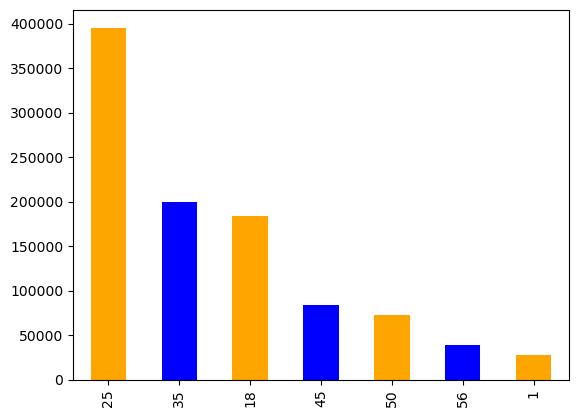

In [24]:
# plot bar chart for age
df.Age.value_counts().plot(kind = "bar" , color = ["orange" , "blue"])
plt.show()

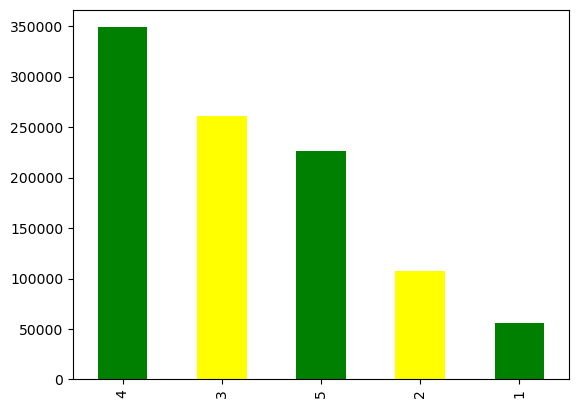

In [26]:
# Plot bar chart for Rating
df.Rating.value_counts().plot(kind = "bar" , color = ["green" , "yellow"])
plt.show()

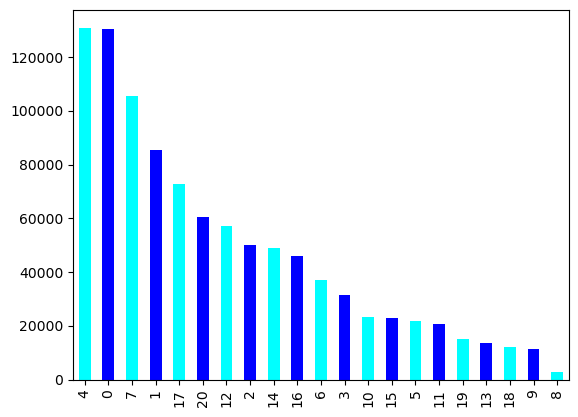

In [27]:
# Plot bar chart for Occupation
df.Occupation.value_counts().plot(kind = "bar" , color = ["cyan" , "blue"])
plt.show()

Age
18    34
25    72
35    29
45    12
50     4
56     7
Name: MovieID, dtype: int64

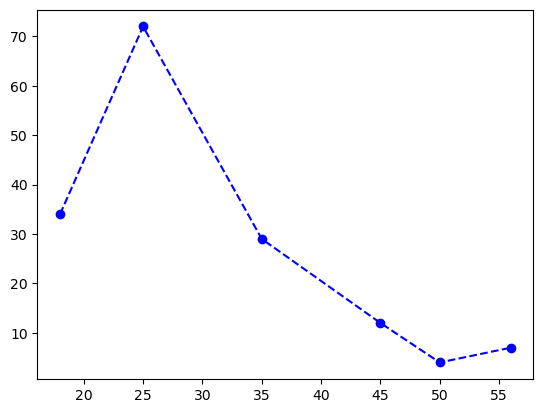

In [28]:
# visualize the data for movie name "Only You (1994)"
res =  df[df.Title == "Only You (1994)"]

plt.plot(res.groupby("Age")["MovieID"].count() , "--bo")
res.groupby ("Age")["MovieID"].count()

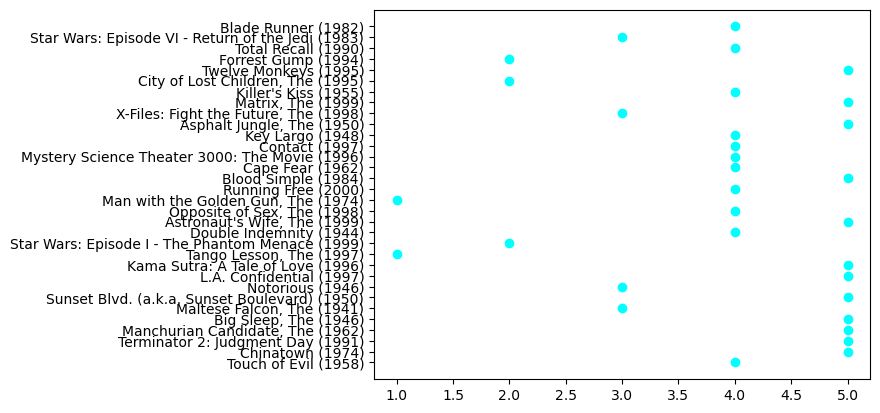

In [44]:
# plot the scatter plot for UserID==700 with respect to movie title and rating
res = df[df.UserID==700]
plt.scatter(y = res.Title , x = res.Rating , color = "aqua")
plt.show()

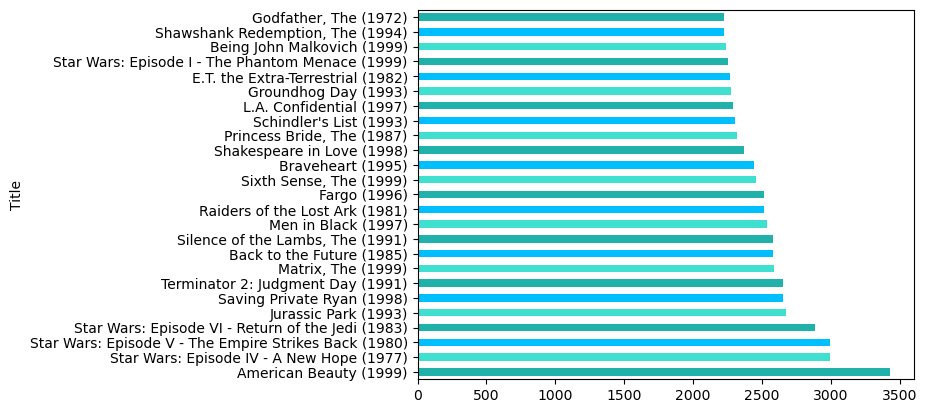

In [30]:
res = df.groupby("Title").size().sort_values(ascending = False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
res.plot(kind = "barh" , color = ["lightseagreen" , "turquoise" ,"deepskyblue"])
plt.show()

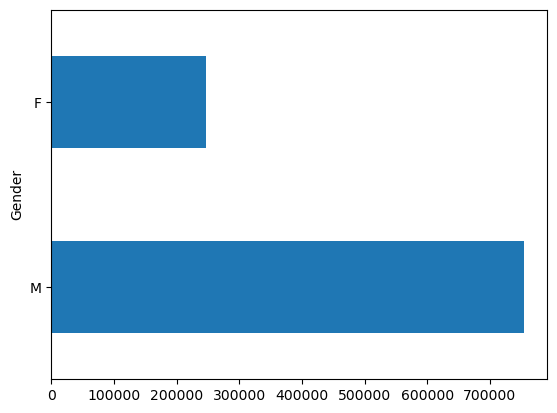

In [31]:
# plot bar chart for gender 
res = df.groupby("Gender").size().sort_values(ascending=False)[:25]
plt.ylabel("Gender")
plt.xlabel("Viewership Count")
res.plot(kind="barh")
plt.show()

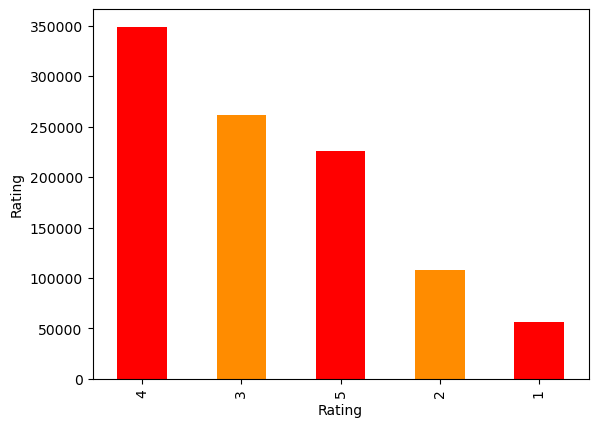

In [43]:
# plot bar chart for Rating with respect to views
res = df.groupby("Rating").size().sort_values(ascending = False)[:25]
plt.ylabel("Rating")
plt.xlabel("Views")
res.plot(kind = "bar" , color = ["red" , "darkorange"])
plt.show()

## Multivariate Analysis 

In [45]:
#see correlation between variables
df.corr()

,MovieID,UserID,Age,Occupation,Rating
MovieID,1.000000,-0.017740,0.027573,0.008585,-0.064041
UserID,-0.017740,1.000000,0.034684,-0.026697,0.012305
Age,0.027573,0.034684,1.000000,0.078372,0.056872
Occupation,0.008585,-0.026697,0.078372,1.000000,0.006753
Rating,-0.064041,0.012305,0.056872,0.006753,1.000000


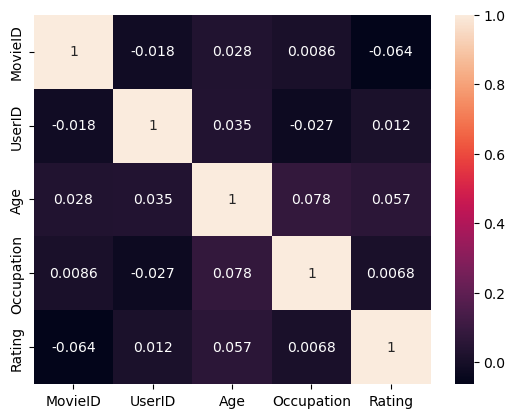

In [33]:
# plot heatmap to visualize the correlation
sns.heatmap(df.corr(),  annot = True)
plt.show()

# Machine Learning

In [34]:
# Extract first 500 rows to apply algorithms
first_500 = df[500:]
first_500.dropna(inplace = True)
first_500

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
500,17,Sense and Sensibility (1995),6,50,F,9,4
501,3699,Starman (1984),6,50,F,9,4
502,1441,Benny & Joon (1993),6,50,F,9,4
503,1088,Dirty Dancing (1987),6,50,F,9,5
504,912,Casablanca (1942),6,50,F,9,4
...,...,...,...,...,...,...,...
1000203,1091,Weekend at Bernie's (1989),6040,25,M,6,1
1000204,1094,"Crying Game, The (1992)",6040,25,M,6,5
1000205,562,Welcome to the Dollhouse (1995),6040,25,M,6,5
1000206,1096,Sophie's Choice (1982),6040,25,M,6,4


In [35]:
# Use the Features or Columns: movieID, age, occupation
X = first_500[['MovieID', 'Age', 'Occupation']].values
X

array([[  17,   50,    9],
       [3699,   50,    9],
       [1441,   50,    9],
       ...,
       [ 562,   25,    6],
       [1096,   25,    6],
       [1097,   25,    6]], dtype=int64)

In [36]:
# use the Rating column as labels
y= first_500[['Rating']].values
y

array([[4],
       [4],
       [4],
       ...,
       [5],
       [4],
       [4]], dtype=int64)

In [37]:
# create train and test data set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=100)

# Machine Learning Models

### Logistic Regression 

In [38]:
# Calculate Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train , y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,y_train)*100,2)
acc_log

34.89

### Decision Tree 

In [39]:
# Calculate decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
decision_tree_score = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_tree_score

56.56

### K Nearest Neighbors Classifier 

In [40]:
# Calculate KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train , y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,y_train)*100,2)
acc_knn

44.96

### Gaussian Naive Bayes 

In [41]:
# Calculate Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
gaussian_score = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_score

34.93